In [1]:
import numpy as np
from scipy.stats import hypergeom
from math import ceil
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
N = 100
real_bills = 25
fakes = range(N)

In [3]:
expected_deposits = np.zeros(N)
expected_caught = np.zeros(N)
for idx, fake in enumerate(fakes):
    # total attempted deposited $100 bills
    total = real_bills + fake
    # number in  each expected sample
    sample = ceil(total * .05)
    distribution = np.zeros(sample+1)
    prob_caught = np.zeros(sample+1)
    # compute distribution of each number of fakes being chosen
    # and the probability of at least one fake being recognized as fake
    for i in range(sample+1):
        distribution[i] = hypergeom.pmf(i, total, fake, sample)
        prob_caught[i] = (1-.75**i)
    # then compute the probability of a fake being discovered
    # over the distribution of fakes drawn for inspection
    prob_fakes_discovered = np.dot(distribution, prob_caught)
    #expected deposit amount:
    expected_deposit = (1 - prob_fakes_discovered) * total * 100
    expected_deposits[idx] = expected_deposit
    expected_caught[idx] = prob_fakes_discovered
    
    print(total, fake, sample, f'{prob_fakes_discovered:.2f}', f'{expected_deposit:.2f}')

25 0 2 0.00 2500.00
26 1 2 0.02 2550.00
27 2 2 0.04 2600.48
28 3 2 0.05 2651.39
29 4 2 0.07 2702.68
30 5 2 0.08 2754.31
31 6 2 0.09 2806.25
32 7 2 0.11 2858.47
33 8 2 0.12 2910.94
34 9 2 0.13 2963.64
35 10 2 0.14 3016.54
36 11 2 0.15 3069.64
37 12 2 0.16 3122.92
38 13 2 0.16 3176.35
39 14 2 0.17 3229.93
40 15 2 0.18 3283.65
41 16 3 0.27 3009.13
42 17 3 0.27 3045.50
43 18 3 0.28 3082.16
44 19 3 0.29 3119.10
45 20 3 0.30 3156.28
46 21 3 0.31 3193.70
47 22 3 0.31 3231.34
48 23 3 0.32 3269.18
49 24 3 0.33 3307.21
50 25 3 0.33 3345.42
51 26 3 0.34 3383.80
52 27 3 0.34 3422.33
53 28 3 0.35 3461.02
54 29 3 0.35 3499.83
55 30 3 0.36 3538.78
56 31 3 0.36 3577.86
57 32 3 0.37 3617.05
58 33 3 0.37 3656.34
59 34 3 0.37 3695.75
60 35 3 0.38 3735.25
61 36 4 0.47 3214.55
62 37 4 0.48 3242.11
63 38 4 0.48 3269.81
64 39 4 0.48 3297.64
65 40 4 0.49 3325.60
66 41 4 0.49 3353.68
67 42 4 0.50 3381.88
68 43 4 0.50 3410.19
69 44 4 0.50 3438.60
70 45 4 0.50 3467.12
71 46 4 0.51 3495.73
72 47 4 0.51 3524.43
73

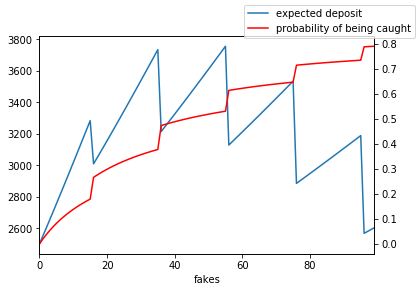

In [4]:
df = pd.DataFrame({'fakes': fakes, 'expected deposit': expected_deposits, 'probability of being caught': expected_caught})
ax = df.plot(x='fakes', y='expected deposit', legend=False)
ax2 = ax.twinx()
df.plot(x='fakes', y='probability of being caught', ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

In [5]:
import sys, IPython, scipy, matplotlib, platform
print("This notebook was createad on a computer %s running %s and using:\nPython %s\nIPython %s\nNumPy %s\nPandas %s\nSciPy %s\nMatplotlib %s\n" % (platform.machine(), ' '.join(platform.linux_distribution()[:2]), sys.version[:5], IPython.__version__, np.__version__, pd.__version__, scipy.__version__, matplotlib.__version__))

This notebook was createad on a computer x86_64 running debian buster/sid and using:
Python 3.7.4
IPython 7.7.0
NumPy 1.17.0
Pandas 0.25.1
SciPy 1.3.1
Matplotlib 3.1.1



/home/dave/miniconda3/envs/racket_riddle/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: dist() and linux_distribution() functions are deprecated in Python 3.5
  
